In [2]:
import glob
import os
import tempfile
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
from datetime import timedelta

from math import atan2 as atan2
from datetime import datetime

from metpy.plots import USCOUNTIES
from metpy.calc import dewpoint_from_relative_humidity
from metpy.units import units
from matplotlib.dates import DateFormatter, date2num
import imageio
import pyart
import nexradaws

import sage_data_client

templocation = tempfile.mkdtemp()

import os

import matplotlib.pyplot as plt

import act

import math

warnings.filterwarnings("ignore")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [3]:
## NEIU AQT 
df_aq = sage_data_client.query(start = "2023-07-04" + 'T' + "00:00:00" + 'Z',
                               end = "2023-07-05" + 'T' + "18:00:00" + 'Z', 
                               filter={
                                        "plugin": "registry.sagecontinuum.org/jrobrien/waggle-aqt:0.23.5.*",
                                       }
)
# extract the particle measurements from the DataFrame
pm25 = df_aq[df_aq['name']=='aqt.particle.pm2.5']
pm10 = df_aq[df_aq['name']=='aqt.particle.pm1']
pm100 = df_aq[df_aq['name']=='aqt.particle.pm10']

# extract the gas measurements from the DataFrame
no = df_aq[df_aq['name']=='aqt.gas.no']
o3 = df_aq[df_aq['name']=='aqt.gas.ozone']
no2 = df_aq[df_aq['name']=='aqt.gas.no2']
co = df_aq[df_aq['name']=='aqt.gas.co']

# extract the environment data from the DataFrame
aqtemp = df_aq[df_aq['name']=='aqt.env.temp']
aqhum = df_aq[df_aq['name']=='aqt.env.humidity']

# Convert values to numpy arrays
aqvals = pm25.set_index('timestamp')
aqvals['pm2.5'] = aqvals.value.to_numpy().astype(float)
aqvals['pm1.0'] = pm10.value.to_numpy().astype(float)
aqvals['pm10.0'] = pm100.value.to_numpy().astype(float)
aqvals['no'] = no.value.to_numpy().astype(float)
aqvals['o3'] = o3.value.to_numpy().astype(float)
aqvals['no2'] = no2.value.to_numpy().astype(float)
aqvals['co'] = co.value.to_numpy().astype(float)
aqvals['temp'] =  aqtemp.value.to_numpy().astype(float)
aqvals['hum'] =  aqhum.value.to_numpy().astype(float)

# Use MetPY to calculate dewpoint from temperature and relative humidity
dp = dewpoint_from_relative_humidity( aqvals.temp.to_numpy() * units.degC, 
                                     aqvals.hum.to_numpy() * units.percent)

aqvals['dewpoint'] = dp

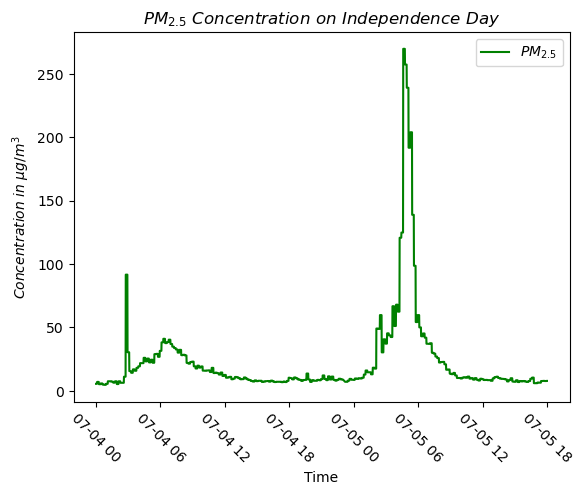

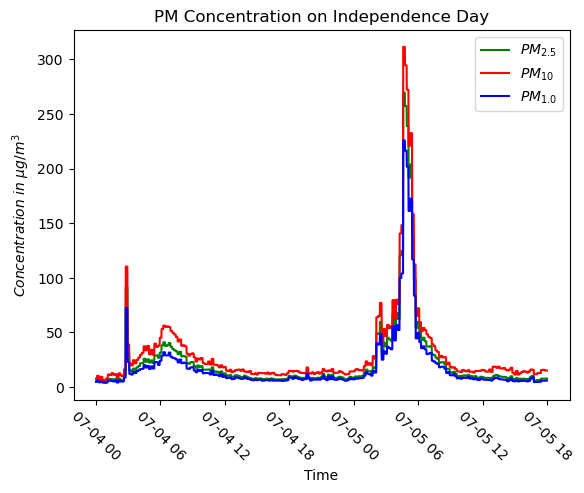

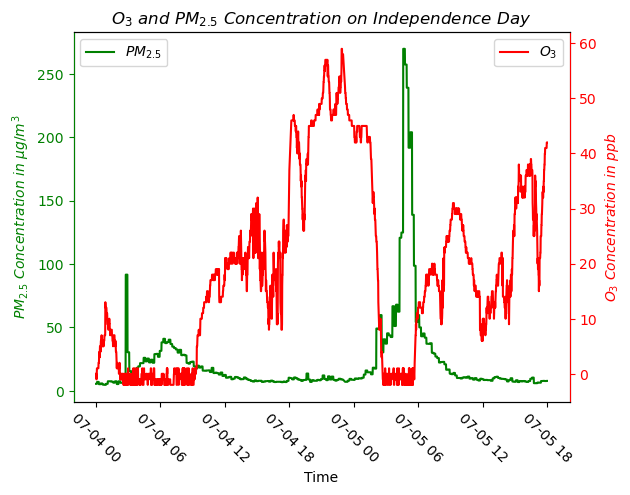

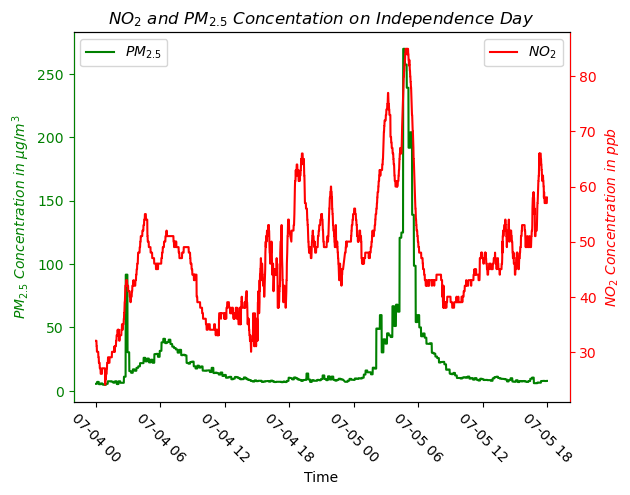

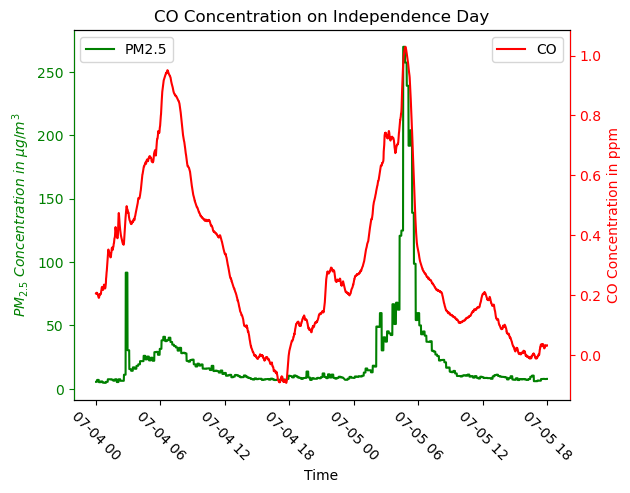

In [24]:
plt.plot(pm25["timestamp"], pm25["value"], color="Green", label="$PM_{2.5}$")
plt.xlabel("Time")
plt.ylabel("$ Concentration\ in\  \mu g/m^3$")
plt.title("$PM_{2.5}\ Concentration\ on\ Independence\ Day$")
plt.xticks(rotation=315)
plt.legend()
plt.savefig("Independence_PM25_only")

plt.figure()
plt.plot(pm25["timestamp"], pm25["value"], color="Green", label="$PM_{2.5}$")
plt.plot(pm100["timestamp"], pm100["value"], color="Red", label="$PM_{10}$")
plt.plot(pm10["timestamp"], pm10["value"], color="Blue", label="$PM_{1.0}$")
plt.xlabel("Time")
plt.ylabel("$Concentration\ in\ \mu g/m^3$")
plt.title("PM Concentration on Independence Day")
plt.xticks(rotation=315)
plt.legend()
plt.savefig("Independence_PM")

fig, ax1 = plt.subplots()
plt.plot(pm25["timestamp"], pm25["value"], color="Green", label="$PM_{2.5}$")
plt.xlabel("Time")
plt.ylabel("$PM_{2.5}\ Concentration\ in\ \mu g/m^3$", color="Green")
ax1.tick_params(axis="y", colors="Green")
plt.title("$O_{3}\ and\ PM_{2.5}\ Concentration\ on\ Independence\ Day$")
plt.xticks(rotation=315)
plt.legend(loc=2)
ax2 = ax1.twinx()
ax2.spines["left"].set_color("Green")
ax2.spines["right"].set_color("Red")
ax2.tick_params(axis="y", colors="Red")
ax2.plot(o3["timestamp"], o3["value"]*1000, color="Red", label="$O_{3}$")
plt.legend(loc=1)
plt.ylabel("$O_{3}\ Concentration\ in\ ppb$", color="Red")
plt.savefig("Independence_pm25_o3")

fig, ax1 = plt.subplots()
plt.plot(pm25["timestamp"], pm25["value"], color="Green", label="$PM_{2.5}$")
plt.xlabel("Time")
plt.xticks(rotation=315)
plt.legend(loc=2)
plt.ylabel("$PM_{2.5}\ Concentration\ in\ \mu g/m^3$", color="Green")
ax1.tick_params(axis="y", colors="Green")
plt.title("$NO_{2}\ and\ PM_{2.5}\ Concentation\ on\ Independence\ Day$")

ax2 = ax1.twinx()
ax2.plot(no2["timestamp"], no2["value"]*1000, color="Red", label="$NO_{2}$")
plt.legend(loc=1)
ax2.spines["left"].set_color("Green")
ax2.spines["right"].set_color("Red")
ax2.tick_params(axis="y", colors="Red")
plt.ylabel("$NO_{2}\ Concentration\ in\ ppb$", color="Red")
plt.savefig("Independence_pm25_no2")


fig, ax1 = plt.subplots()
plt.plot(pm25["timestamp"], pm25["value"], color="Green", label="PM2.5")
plt.legend(loc=2)
plt.xlabel("Time")
plt.ylabel("$PM_{2.5}\ Concentration\ in\ \mu g/m^3$", color="Green")
plt.xticks(rotation=315)
ax1.tick_params(axis="y", colors="Green")
plt.title("CO Concentration on Independence Day")
ax2 = ax1.twinx()
ax2.plot(co["timestamp"], co["value"], color="Red", label="CO")
plt.legend(loc=1)
ax2.spines["left"].set_color("Green")
ax2.spines["right"].set_color("Red")
ax2.tick_params(axis="y", colors="Red")
plt.ylabel("CO Concentration in ppm", color="Red")
plt.savefig("Independence_pm25_co")

(array([19541.  , 19541.25, 19541.5 , 19541.75, 19542.  , 19542.25,
        19542.5 , 19542.75]),
 [Text(19541.0, 0, '07-03 00'),
  Text(19541.25, 0, '07-03 06'),
  Text(19541.5, 0, '07-03 12'),
  Text(19541.75, 0, '07-03 18'),
  Text(19542.0, 0, '07-04 00'),
  Text(19542.25, 0, '07-04 06'),
  Text(19542.5, 0, '07-04 12'),
  Text(19542.75, 0, '07-04 18')])

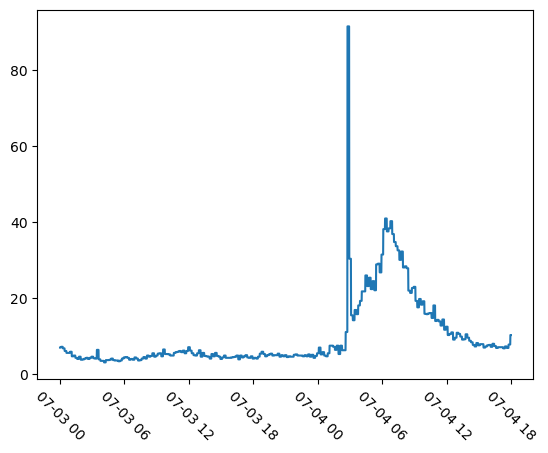

In [23]:
## Testing data from 3rd July

## NEIU AQT 
df_aq = sage_data_client.query(start = "2023-07-03" + 'T' + "00:00:00" + 'Z',
                               end = "2023-07-04" + 'T' + "18:00:00" + 'Z', 
                               filter={
                                        "plugin": "registry.sagecontinuum.org/jrobrien/waggle-aqt:0.23.5.*",
                                       }
)
# extract the particle measurements from the DataFrame
pm25 = df_aq[df_aq['name']=='aqt.particle.pm2.5']
pm10 = df_aq[df_aq['name']=='aqt.particle.pm1']
pm100 = df_aq[df_aq['name']=='aqt.particle.pm10']

# extract the gas measurements from the DataFrame
no = df_aq[df_aq['name']=='aqt.gas.no']
o3 = df_aq[df_aq['name']=='aqt.gas.ozone']
no2 = df_aq[df_aq['name']=='aqt.gas.no2']
co = df_aq[df_aq['name']=='aqt.gas.co']

"""

# extract the environment data from the DataFrame
aqtemp = df_aq[df_aq['name']=='aqt.env.temp']
aqhum = df_aq[df_aq['name']=='aqt.env.humidity']

# Convert values to numpy arrays
aqvals = pm25.set_index('timestamp')
aqvals['pm2.5'] = aqvals.value.to_numpy().astype(float)
aqvals['pm1.0'] = pm10.value.to_numpy().astype(float)
aqvals['pm10.0'] = pm100.value.to_numpy().astype(float)
aqvals['no'] = no.value.to_numpy().astype(float)
aqvals['o3'] = o3.value.to_numpy().astype(float)
aqvals['no2'] = no2.value.to_numpy().astype(float)
aqvals['co'] = co.value.to_numpy().astype(float)
aqvals['temp'] =  aqtemp.value.to_numpy().astype(float)
aqvals['hum'] =  aqhum.value.to_numpy().astype(float)

# Use MetPY to calculate dewpoint from temperature and relative humidity
dp = dewpoint_from_relative_humidity( aqvals.temp.to_numpy() * units.degC, 
                                     aqvals.hum.to_numpy() * units.percent)

aqvals['dewpoint'] = dp

"""

plt.plot(pm25["timestamp"], pm25["value"])
plt.xticks(rotation=315)